In [37]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.layers import Flatten, Dense, LSTM, Dropout, Embedding, Activation
from keras.layers import concatenate, BatchNormalization, Input
from keras.layers.merge import add


In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [38]:
from tensorflow.keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import cv2
import string
import time

In [39]:
token_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr8k.token.txt'
text = open(token_path, 'r', encoding = 'utf-8').read()
print(text[:500])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7


In [40]:
def load_description(text):
    mapping = dict()
    for line in text.split("\n"):
        token = line.split("\t")
        if len(line) < 2:
            continue
        img_id = token[0].split('.')[0]
        img_des = token[1]
        if img_id not in mapping:
            mapping[img_id] = list()
        mapping[img_id].append(img_des)
    return mapping

descriptions = load_description(text)
print("Number of items: " + str(len(descriptions)))

Number of items: 8092


In [41]:
descriptions['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [42]:
def clean_description(desc):
    for key, des_list in desc.items():
        for i in range(len(des_list)):
            caption = des_list[i]
            caption = [ch for ch in caption if ch not in string.punctuation]
            caption = ''.join(caption)
            caption = caption.split(' ')
            caption = [word.lower() for word in caption if len(word)>1 and word.isalpha()]
            caption = ' '.join(caption)
            des_list[i] = caption

clean_description(descriptions)
descriptions['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [43]:
def to_vocab(desc):
    words = set()
    for key in desc.keys():
        for line in desc[key]:
            words.update(line.split())
    return words
vocab = to_vocab(descriptions)
len(vocab)

8763

In [44]:
import glob
images = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\\'
# Create a list of all image names in the directory
img = glob.glob(images + '*.jpg')
len(img)

8091

In [45]:
print(len(images))

74


In [46]:
print(img)

['C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1000268201_693b08cb0e.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1001773457_577c3a7d70.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1002674143_1b742ab4b8.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1003163366_44323f5815.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1007129816_e794419615.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1007320043_627395c3d8.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1009434119_febe49276a.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1012212859_01547e3f17.jpg', 'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images\\1015118661_980735411b.jpg', 'C:\\User

In [47]:
train_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr_8k.trainImages.txt'
train_images = open(train_path, 'r', encoding = 'utf-8').read().split("\n")
train_img = []

for im in img:
    if(im[len(images)-1:] in train_images):
        train_img.append(im)
len(train_img)        

6000

In [48]:
test_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr_8k.testImages.txt'
test_images = open(test_path, 'r', encoding = 'utf-8').read().split("\n")
test_img = []

for im in img:
    #print(im[len(images)-1: ])
    if(im[len(images)-1: ] in test_images):
        test_img.append(im)
len(test_img)

1000

In [49]:
print(test_images)

['3385593926_d3e9c21170.jpg', '2677656448_6b7e7702af.jpg', '311146855_0b65fdb169.jpg', '1258913059_07c613f7ff.jpg', '241347760_d44c8d3a01.jpg', '2654514044_a70a6e2c21.jpg', '2339106348_2df90aa6a9.jpg', '256085101_2c2617c5d0.jpg', '280706862_14c30d734a.jpg', '3072172967_630e9c69d0.jpg', '3482062809_3b694322c4.jpg', '1167669558_87a8a467d6.jpg', '2847615962_c330bded6e.jpg', '3344233740_c010378da7.jpg', '2435685480_a79d42e564.jpg', '3110649716_c17e14670e.jpg', '2511019188_ca71775f2d.jpg', '2521770311_3086ca90de.jpg', '2723477522_d89f5ac62b.jpg', '2218609886_892dcd6915.jpg', '3745451546_fc8ec70cbd.jpg', '2844018783_524b08e5aa.jpg', '3100251515_c68027cc22.jpg', '2207244634_1db1a1890b.jpg', '2943023421_e297f05e11.jpg', '3286822339_5535af6b93.jpg', '2479652566_8f9fac8af5.jpg', '1394368714_3bc7c19969.jpg', '872622575_ba1d3632cc.jpg', '2309860995_c2e2a0feeb.jpg', '241347204_007d83e252.jpg', '3502343542_f9b46688e5.jpg', '757332692_6866ae545c.jpg', '2748729903_3c7c920c4d.jpg', '494792770_2c5f767ac

In [50]:
#load descriptions of train and test set separately
def load_clean_descriptions(des, dataset):
    dataset_des = dict()
    for key, des_list in des.items():
        if key+'.jpg' in dataset:
            if key not in dataset_des:
                dataset_des[key] = list()
            for line in des_list:
                desc = 'startseq ' + line + ' endseq'
                dataset_des[key].append(desc)
    return dataset_des

train_descriptions = load_clean_descriptions(descriptions, train_images)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [51]:
train_descriptions['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [52]:
from keras.preprocessing.image import load_img, img_to_array
def preprocess_img(img_path):
    #inception v3 excepts img in 299*299
    img = load_img(img_path, target_size = (299, 299))
    x = img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    return x

In [53]:
base_model = InceptionV3(weights = 'imagenet')
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [54]:
model = Model(base_model.input, base_model.layers[-2].output)

In [55]:
#function to encode an image into a vector using inception v3
def encode(image):
    image = preprocess_img(image)
    vec = model.predict(image)
    vec = np.reshape(vec, (vec.shape[1]))
    return vec

In [56]:
#run the encode function on all train images
start = time.time()
encoding_train = {}


In [61]:
for img in train_img:
    encoding_train[img[len(images)-1:]] = encode(img)
print("Time Taken is: " + str(time.time() - start))

Time Taken is: 1028.246104001999


In [62]:
#Encode all the test images
start = time.time()
encoding_test = {}
for img in test_img:
    encoding_test[img[len(images)-1:]] = encode(img)
print("Time taken is: " + str(time.time() - start))

Time taken is: 124.75263214111328


In [63]:
train_features = encoding_train
test_features = encoding_test
print("Train image encodings: " + str(len(train_features)))
print("Test image encodings: " + str(len(test_features)))

Train image encodings: 18000
Test image encodings: 1000


In [64]:
train_features['1000268201_693b08cb0e.jpg'].shape

(2048,)

In [65]:
#list of all training captions
all_train_captions = []
for key, val in train_descriptions.items():
    for caption in val:
        all_train_captions.append(caption)
len(all_train_captions)

30000

In [66]:
#onsider only words which occur atleast 10 times
vocabulary = vocab
threshold = 10
word_counts = {}
for cap in all_train_captions:
    for word in cap.split(' '):
        word_counts[word] = word_counts.get(word, 0) + 1

vocab = [word for word in word_counts if word_counts[word] >= threshold]
print("Unique words: " + str(len(word_counts)))
print("our Vocabulary: " + str(len(vocab)))

Unique words: 7578
our Vocabulary: 1651


In [67]:
#word mapping to integers
ixtoword = {}
wordtoix = {}

ix = 1
for word in vocab:
    wordtoix[word] = ix
    ixtoword[ix] = word
    ix += 1

In [68]:
vocab_size = len(ixtoword) + 1  #1 for appended zeros
vocab_size

1652

In [69]:
#find the maximum length of a description in a dataset
max_length = max(len(des.split()) for des in all_train_captions)
max_length

34

In [70]:
#since there are almost 30000 descriptions to process we will use datagenerator
X1, X2, y = list(), list(), list()
for key, des_list in train_descriptions.items():
    pic = train_features[key + '.jpg']
    for cap in des_list:
        seq = [wordtoix[word] for word in cap.split(' ') if word in wordtoix]
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen = max_length)[0]
            out_seq = to_categorical([out_seq], num_classes = vocab_size)[0]
            #store
            X1.append(pic)
            X2.append(in_seq)
            y.append(out_seq)

X2 = np.array(X2)
X1 = np.array(X1)
y = np.array(y)
print(X1.shape)

(292328, 2048)


In [73]:
#load glove vectors for embedding layer
embeddings_index = {}
glove = open(r'C:\Users\sadia_tisha1\Desktop\NLP Project\glove.6B.200d.txt', 'r', encoding = 'utf-8').read()
for line in glove.split("\n"):
    values = line.split(" ")
    word = values[0]
    indices = np.asarray(values[1: ], dtype = 'float32')
    embeddings_index[word] = indices
print('Total word vectors: ' + str(len(embeddings_index)))

Total word vectors: 400001


In [74]:
emb_dim = 200
emb_matrix = np.zeros((vocab_size, emb_dim))
for word, i in wordtoix.items():
    emb_vec = embeddings_index.get(word)
    if emb_vec is not None:
        emb_matrix[i] = emb_vec
emb_matrix.shape

(1652, 200)

In [75]:
# define the model
ip1 = Input(shape = (2048, ))
fe1 = Dropout(0.2)(ip1)
fe2 = Dense(256, activation = 'relu')(fe1)
ip2 = Input(shape = (max_length, ))
se1 = Embedding(vocab_size, emb_dim, mask_zero = True)(ip2)
se2 = Dropout(0.2)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation = 'relu')(decoder1)
outputs = Dense(vocab_size, activation = 'softmax')(decoder2)
model = Model(inputs = [ip1, ip2], outputs = outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 200)      330400      ['input_4[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_3[0][0]']                
                                                                                            

In [76]:
model.layers[2]

In [78]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [80]:
model.layers[2].set_weights([emb_matrix])
model.layers[2].trainable = False
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [83]:
for i in range(30):
    model.fit([X1, X2], y, epochs = 1, batch_size = 256)
    if(i%2 == 0):
        model.save_weights("image-caption-weights" + str(i) + ".h5")

1142/1142 [==============================] - 360s 315ms/step - loss: 1.5467


In [84]:
def greedy_search(pic):
    start = 'startseq'
    for i in range(max_length):
        seq = [wordtoix[word] for word in start.split() if word in wordtoix]
        seq = pad_sequences([seq], maxlen = max_length)
        yhat = model.predict([pic, seq])
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        start += ' ' + word
        if word == 'endseq':
            break
    final = start.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

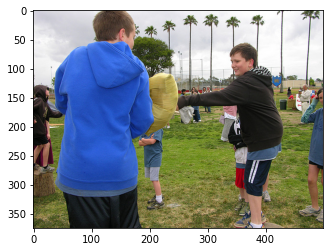

boy in blue jacket is standing in front of several children


In [85]:
pic = list(encoding_test.keys())[250]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

In [86]:
print(greedy_search(img))

boy in blue jacket is standing in front of several children


In [87]:
model.save("glove.h5")

In [88]:
#train it for some more time
model.fit([X1, X2], y, epochs = 1, batch_size = 64)
model.save("glove_"+str(i)+".h5")

4568/4568 [==============================] - 652s 143ms/step - loss: 1.9856


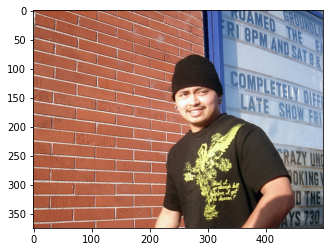

man in blue shirt and jeans is standing in front of brick wall


In [89]:
pic = list(encoding_test.keys())[888]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

In [90]:
model.save("glove_v2.h5")

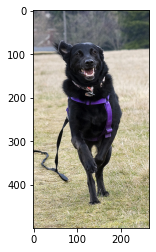

black dog runs through field


In [96]:
pic = list(encoding_test.keys())[620]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

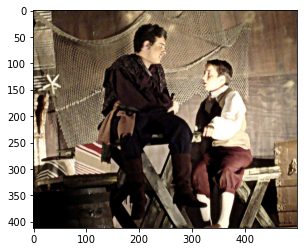

two young men sit on opposite arm stage


In [97]:
pic = list(encoding_test.keys())[850]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

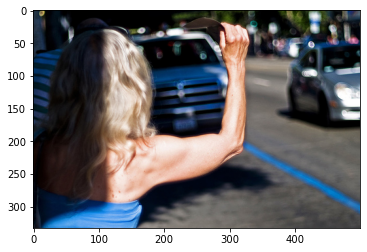

young boy wearing dances and scarf


In [98]:
pic = list(encoding_test.keys())[0]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

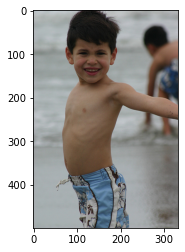

young boy in swim trunks is


In [99]:
pic = list(encoding_test.keys())[1]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

In [107]:
refs=["A boy in his blue swim short at a beach","A boy smile for the camera at a beach","A young boy in swim trunk be walk with his arm outstretched on a beach", "child play on a beach","A boy be play on the shore of an ocean" ]
candidate="young boy in swim trunks is"
print(BLEU_star(refs, candidate))
print(BLEU_star_compact(refs, candidate))

0.6666666666666666
0.6666666666666666


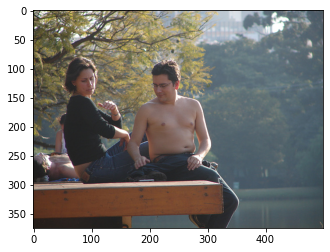

man in black shirt and jeans is standing on his arm whilst biking


In [100]:
pic = list(encoding_test.keys())[2]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

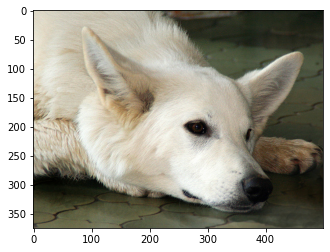

deer and bird are fighting over blue and blue sky


In [101]:
pic = list(encoding_test.keys())[3]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

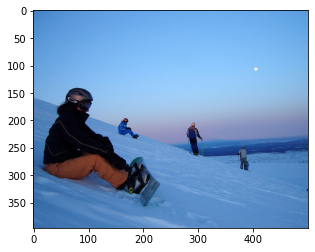

man sits on snow outside lit pink


In [102]:
pic = list(encoding_test.keys())[10]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

In [103]:
from collections import Counter

# compute a very naïve BLEU score -- for educational purposes only

def BLEU_star(refs, candidate):
    
    # tokenize the references and the candidate
    refs = [ref.split() for ref in refs]
    candidate = candidate.split()

    # compute word frequencies for the references and the candidate
    refs_counts = [Counter(ref) for ref in refs]
    candidate_counts = Counter(candidate)

    covered = 0
    total = 0
    
    # compute the coverage for each word
    for word, count in candidate_counts.items():
        covered += min(count, max([ref[word] for ref in refs_counts]))
        total += count
    
    # note: we can also use len(candidate) instead of total :)
    return covered / total

# a more "pythonic" way to compute BLUE_star 

def BLEU_star_compact(refs, candidate):
    refs = [ref.split() for ref in refs]
    candidate = candidate.split()

    return sum([min(count, max([ref[word] for ref in [Counter(ref) for ref in refs]])) for word, count in Counter(candidate).items()])/len(candidate)

In [104]:
refs=["A snowboarder sit on a slope with skier and boarder nearby","A snowboarder take a rest on a mountainside", "Snowboarder sit in the snow while skier take a hill","A snowboarder be sit down","Two skier stand , two sit on slope"]
candidate="man sits on snow outside lit pink"
print(BLEU_star(refs, candidate))
print(BLEU_star_compact(refs, candidate))

0.2857142857142857
0.2857142857142857


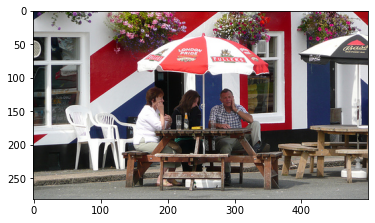

man sits on bench table with sleeping from parked table


In [105]:
pic = list(encoding_test.keys())[20]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

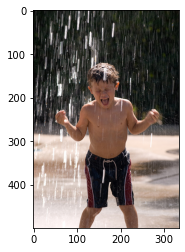

young boy in swimsuit getting splashed in water fountain


In [106]:
pic = list(encoding_test.keys())[30]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))